Template for building simple pipeline for data. Codes explanation are at https://youranalystbuddy.com/processing-pipeline/

## Load and split train-test

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('students-numeric.csv')

In [2]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)

#### after this point, basic analysis are only applied on training data

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 803 to 695
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HighSchoolGPA      800 non-null    float64
 1   HSRankPercent      800 non-null    int64  
 2   AvgDailyStudyTime  785 non-null    float64
 3   TotalAbsence       791 non-null    float64
 4   SATMath            800 non-null    int64  
 5   SATVerbal          800 non-null    int64  
 6   FirstYearCredit    800 non-null    int64  
 7   FirstYearGPA       800 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 56.2 KB


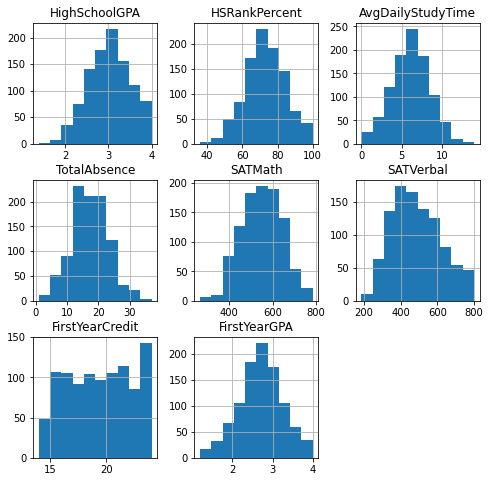

In [4]:
data.hist(figsize=(8,8))
plt.show()

## The manual way

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

scaler = StandardScaler()
imputer = SimpleImputer(strategy='median')

train_processed = train.copy()
train_scaled = scaler.fit_transform(train)
train_processed[:] = imputer.fit_transform(train_scaled)

In [6]:
train_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 803 to 695
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HighSchoolGPA      800 non-null    float64
 1   HSRankPercent      800 non-null    float64
 2   AvgDailyStudyTime  800 non-null    float64
 3   TotalAbsence       800 non-null    float64
 4   SATMath            800 non-null    float64
 5   SATVerbal          800 non-null    float64
 6   FirstYearCredit    800 non-null    float64
 7   FirstYearGPA       800 non-null    float64
dtypes: float64(8)
memory usage: 56.2 KB


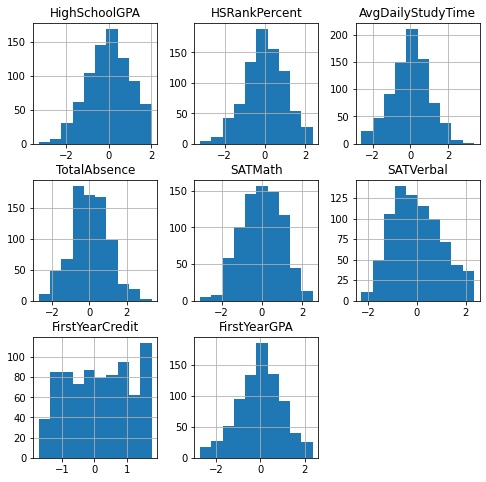

In [7]:
train_processed.hist(figsize=(8,8))
plt.show()

#### applying to testing data

In [8]:
test_processed = test.copy()

test_scaled = scaler.transform(test)
test_processed[:] = imputer.transform(test_scaled)

In [9]:
test_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 398 to 641
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HighSchoolGPA      200 non-null    float64
 1   HSRankPercent      200 non-null    float64
 2   AvgDailyStudyTime  200 non-null    float64
 3   TotalAbsence       200 non-null    float64
 4   SATMath            200 non-null    float64
 5   SATVerbal          200 non-null    float64
 6   FirstYearCredit    200 non-null    float64
 7   FirstYearGPA       200 non-null    float64
dtypes: float64(8)
memory usage: 14.1 KB


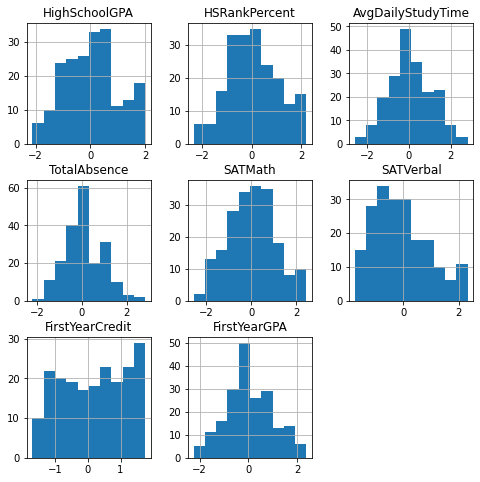

In [10]:
test_processed.hist(figsize=(8,8))
plt.show()

## Pipeline

In [11]:
from sklearn.pipeline import Pipeline

data_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('impute', SimpleImputer(strategy='median'))
])

train_processed = train.copy()
train_processed[:] = data_pipeline.fit_transform(train)

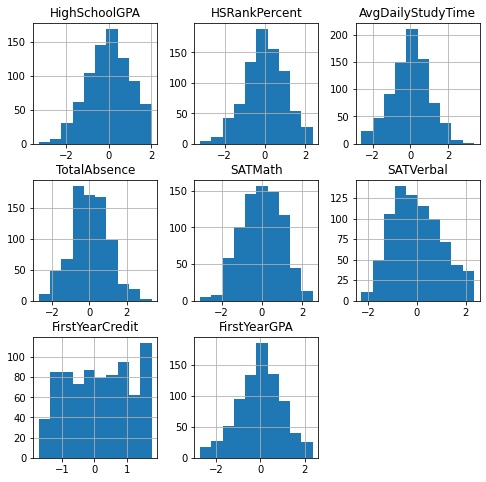

In [12]:
train_processed.hist(figsize=(8,8))
plt.show()

In [13]:
test_processed = test.copy()
test_processed[:] = data_pipeline.transform(test)

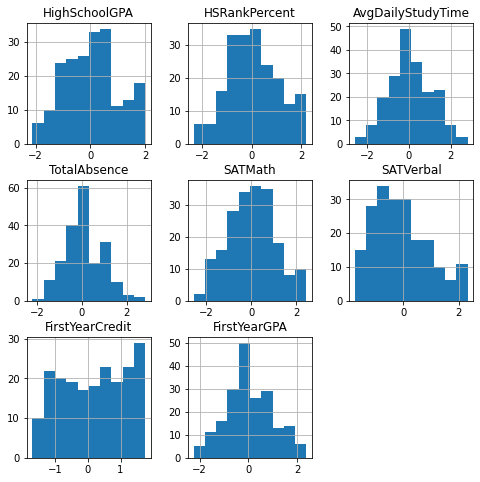

In [14]:
test_processed.hist(figsize=(8,8))
plt.show()